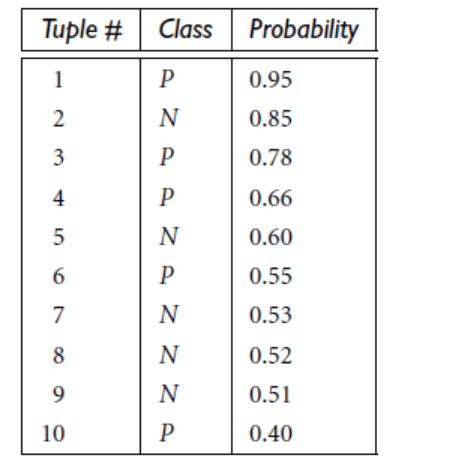

In [9]:
#绘制ROC、PR曲线

#信息转换,转换成01
ground_truth=[1,0,1,1,0,1,0,0,0,1]
pred=[0.95,0.85,0.78,0.66,0.60,0.55,0.53,0.52,0.51,0.40]

In [10]:
#阈值
theta=0.7

In [11]:
#预测结果
def calculate_Predic_result(pred,theta):
    pred_result=[]
    for i in range(len(pred)):
        if pred[i]>theta:
            pred_result.append(1)
        else:
            pred_result.append(0)
    return pred_result
pred_result=calculate_Predic_result(pred,theta)
#pred_result

In [12]:
#计算混淆矩阵
def calculate_matrix(p_result,g_result):
    con1=0
    con2=0
    con3=0
    con4=0
    for i in range(len(g_result)):
        if g_result[i]==1:
            if p_result[i]==g_result[i]:
                con1+=1
            else:
                con2+=1
        else:
            if p_result[i]==g_result[i]:
                con4+=1
            else:
                con3+=1
    return con1,con2,con3,con4
con1,con2,con3,con4 = calculate_matrix(pred_result,ground_truth)
[con1,con2,con3,con4]

[2, 3, 1, 4]

In [13]:
#绘制PR曲线
#不同阈值
thetas=list(range(0,100,10))
thetas=[(i/100) for i in thetas]
print(thetas)
#计算混淆矩阵，并绘制
def calculate_PR(g_truth,pred,theats):
    Ps=[]
    Rs=[]
    #计算预测值
    for i in range(len(g_truth)):
        theta=theats[i]
        p_result=calculate_Predic_result(pred,theta)
        con1,con2,con3,con4=calculate_matrix(p_result,g_truth)
        print([con1,con2,con3,con4])
        
        Ps.append(round(con1/(con1+con3),4))
        Rs.append(round(con1/(con1+con2),4))
    return Ps,Rs
Ps,Rs=calculate_PR(ground_truth,pred,thetas)
#[Ps,Rs]

[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
[5, 0, 5, 0]
[5, 0, 5, 0]
[5, 0, 5, 0]
[5, 0, 5, 0]
[4, 1, 5, 0]
[4, 1, 5, 0]
[3, 2, 1, 4]
[2, 3, 1, 4]
[1, 4, 1, 4]
[1, 4, 0, 5]


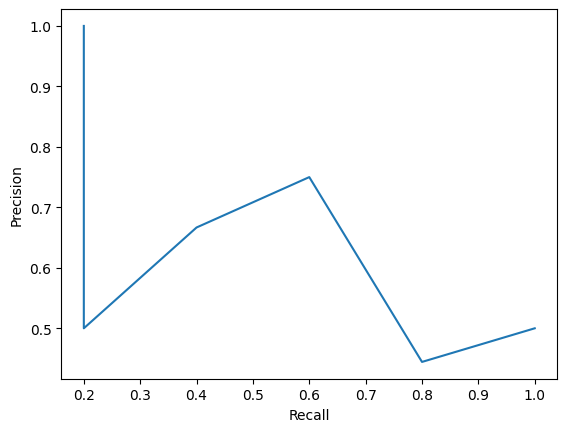

In [14]:
import matplotlib.pyplot as plt
def plot_line(x,y,xlab,ylab):
    plt.plot(x,y)
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.show()
    return 
plot_line(Rs,Ps,'Recall','Precision')

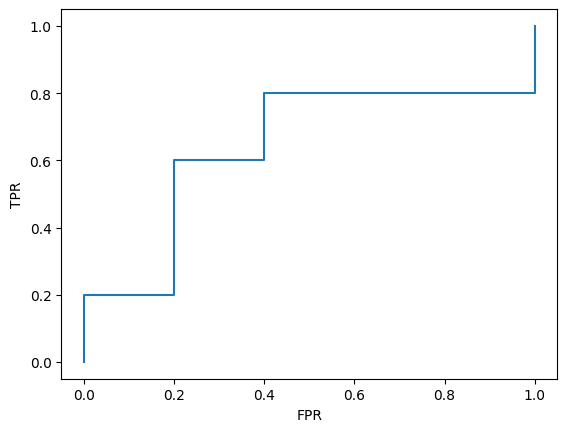

In [29]:
#绘制ROC曲线
import numpy as np
#不同阈值
thetas=np.linspace(0,100,80).tolist()
thetas=[(i/100) for i in thetas]
#print(thetas)
#计算混淆矩阵，并绘制
def calculate_PR(g_truth,pred,thetas):
    TPR=[]
    FPR=[]
    #计算预测值
    for i in range(len(thetas)):
        theta=thetas[i]
        p_result=calculate_Predic_result(pred,theta)
        con1,con2,con3,con4=calculate_matrix(p_result,g_truth)
        #print([con1,con2,con3,con4])
        TPR.append(round(con1/(con1+con2),4))
        FPR.append(round(con3/(con3+con4),4))
    return TPR,FPR
TPR,FPR=calculate_PR(ground_truth,pred,thetas)
plot_line(FPR,TPR,'FPR','TPR')
